# Pandas & Seaborn Progressive Tutorial

This notebook is a step-by-step, hands-on introduction to data analysis with pandas and visualization with seaborn. Each section includes examples and small exercises to help you practice.

In [325]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style for plots
# sns.set(style="darkgrid")
# plt.style.use('dark_background')

## 1. Reading Data Files

Let's start by reading a CSV file into a pandas DataFrame. We'll use seaborn's Titanic dataset for demonstration.

**Example:**

In [326]:
# Read Titanic dataset from seaborn
# (In practice, use pd.read_csv('yourfile.csv'))
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Exercise 1
Read a CSV file (or use another seaborn dataset, e.g., 'iris') into a DataFrame and display the first 5 rows using `.head()`.

In [327]:
# Example solution for Exercise 1
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2. Checking Column Types and DataFrame Info

It's important to understand the structure and types of your data.

**Example:**

In [328]:
# Check column types
print('Column types:')
print(df.dtypes)

Column types:
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


### Exercise 2
Check dtypes of the iris dataset.

In [329]:
# Exercise: Check the column types of the iris dataset
print(iris.dtypes)
iris.info()

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 3. Converting and Renaming Columns

You can convert column types and rename columns for clarity or analysis.

**Example:**

In [330]:
# Convert 'sex' to category
df['sex'] = df['sex'].astype('category')

In [331]:
# Rename 'fare' to 'ticket_price'
df = df.rename(columns={'fare': 'ticket_price'})
df

,survived,pclass,sex,age,sibsp,parch,ticket_price,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Exercise 3
Convert the 'species' column in the iris dataset to a category type and rename 'sepal_length' to 'sepal_len'. Show the first 5 rows.

In [332]:
# Example solution for Exercise 2
iris['species'] = iris['species'].astype('category')
iris = iris.rename(columns={'sepal_length': 'sepal_len'})
iris.head()

,sepal_len,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 4. Accessing Columns and Rows (loc, iloc)

You can access columns and rows using label-based (`loc`) and integer-based (`iloc`) indexing.

**Example:**

In [333]:
# Access a column
df['age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [334]:
# Access a row by label
df.loc[0]

survived                  0
pclass                    3
sex                    male
age                    22.0
sibsp                     1
parch                     0
ticket_price           7.25
embarked                  S
class                 Third
who                     man
adult_male             True
deck                    NaN
embark_town     Southampton
alive                    no
alone                 False
Name: 0, dtype: object

In [335]:
# Access a row by integer position
df.iloc[0]

survived                  0
pclass                    3
sex                    male
age                    22.0
sibsp                     1
parch                     0
ticket_price           7.25
embarked                  S
class                 Third
who                     man
adult_male             True
deck                    NaN
embark_town     Southampton
alive                    no
alone                 False
Name: 0, dtype: object

In [336]:
# Access a range of rows
df.iloc[10:15]

,survived,pclass,sex,age,sibsp,parch,ticket_price,embarked,class,who,adult_male,deck,embark_town,alive,alone
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
13,0,3,male,39.0,1,5,31.2750,S,Third,man,True,NaN,Southampton,no,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True


### Exercise 4
Use `loc` and `iloc` to select:
- The first 3 rows of the iris dataset
- The 'sepal_len' and 'species' columns for rows 5 to 10

In [337]:
# Example solution for Exercise 3 - first 3 rows
iris.iloc[:3]

,sepal_len,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [338]:
# Example solution for Exercise 3 - select specific columns for rows 5-10
iris.loc[5:10, ['sepal_len', 'species']]

,sepal_len,species
5,5.4,setosa
6,4.6,setosa
7,5.0,setosa
8,4.4,setosa
9,4.9,setosa
10,5.4,setosa


## 5. Data Summary and Operations

You can quickly summarize your data and perform operations on columns or rows.

**Example:**

In [339]:
# Summary statistics
df.describe()

,survived,pclass,age,sibsp,parch,ticket_price
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [340]:
# Operations on columns
df['age'].mean(), df['age'].median(), df['age'].sum()

(np.float64(29.69911764705882), np.float64(28.0), np.float64(21205.17))

### Exercise 5
Show the summary statistics for the iris dataset. What is the median of 'sepal_len'? What is the sum of 'petal_width'?

In [341]:
# Example solution for Exercise 4 - Summary statistics
iris.describe()

,sepal_len,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [342]:
# Median and sum
iris['sepal_len'].median(), iris['petal_width'].sum()

(np.float64(5.8), np.float64(179.90000000000003))

## 6. Filtering and Dropping Data

You can filter data using boolean masks and drop rows or columns.

**Example:**

In [343]:
# Filter: passengers older than 60
df_over60 = df[df['age'] > 60]
df_over60.head()

,survived,pclass,sex,age,sibsp,parch,ticket_price,embarked,class,who,adult_male,deck,embark_town,alive,alone
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
170,0,1,male,61.0,0,0,33.5000,S,First,man,True,B,Southampton,no,True


In [344]:
# Drop a column
df_dropped = df.drop(columns=['embark_town'])
df_dropped.head()

,survived,pclass,sex,age,sibsp,parch,ticket_price,embarked,class,who,adult_male,deck,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,no,True


In [345]:
# Drop rows with missing values in 'embarked'
df_no_missing = df.dropna(subset=['embarked'])
df_no_missing.head()

,survived,pclass,sex,age,sibsp,parch,ticket_price,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Exercise 6
Filter the iris dataset to only show rows where 'sepal_len' > 6. Drop the 'species' column from the result.

In [346]:
# Example solution for Exercise 5
iris_filtered = iris[iris['sepal_len'] > 6]
iris_filtered = iris_filtered.drop(columns=['species'])
iris_filtered.head()

,sepal_len,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
54,6.5,2.8,4.6,1.5
56,6.3,3.3,4.7,1.6


## 7. Transforming Columns with `apply`

You can use `apply` to transform or create new columns based on existing data.

**Example:**

In [347]:
# Create a new column 'age_group' using apply
def age_group(age):
    if age < 18:
        return 'child'
    elif age < 60:
        return 'adult'
    else:
        return 'senior'
df['age_group'] = df['age'].apply(age_group)
df[['age', 'age_group']].head()

,age,age_group
0,22.0,adult
1,38.0,adult
2,26.0,adult
3,35.0,adult
4,35.0,adult


### Exercise 7
Create a new column in the iris dataset called 'petal_area' that is the product of 'petal_length' and 'petal_width'. Show the first 5 rows.

In [348]:
# Example solution for Exercise 6
iris['petal_area'] = iris['petal_length'] * iris['petal_width']
iris[['petal_length', 'petal_width', 'petal_area']].head()

,petal_length,petal_width,petal_area
0,1.4,0.2,0.28
1,1.4,0.2,0.28
2,1.3,0.2,0.26
3,1.5,0.2,0.30
4,1.4,0.2,0.28


## 8. Aggregation and GroupBy

You can aggregate data by groups using `groupby` and aggregation functions.

**Example:**

In [349]:
# Average ticket price by class
df.groupby('class')['ticket_price'].mean()

/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_55145/2122899328.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('class')['ticket_price'].mean()


class
First     84.154687
Second    20.662183
Third     13.675550
Name: ticket_price, dtype: float64

In [350]:
# Count of passengers by age group and class
df.groupby(['age_group', 'class']).size()

/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_55145/1176194848.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_group', 'class']).size()


age_group  class 
adult      First     157
           Second    146
           Third     272
child      First      12
           Second     23
           Third      78
senior     First      47
           Second     15
           Third     141
dtype: int64

### Exercise 8
Group the iris dataset by 'species' and calculate the mean of 'petal_area' for each species.

In [351]:
# Example solution for Exercise 7
iris.groupby('species')['petal_area'].mean()

/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_55145/1316534356.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  iris.groupby('species')['petal_area'].mean()


species
setosa         0.3656
versicolor     5.7204
virginica     11.2962
Name: petal_area, dtype: float64

## 9. Stacking, Unstacking, and Pivot Tables

You can reshape your data using stacking, unstacking, and pivot tables.

**Example:**

In [352]:
# Pivot table: average ticket price by class and sex
pivot = df.pivot_table(values='ticket_price', index='class', columns='sex', aggfunc='mean')
pivot

/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_55145/2121303893.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(values='ticket_price', index='class', columns='sex', aggfunc='mean')


sex,female,male
class,,
First,106.125798,67.226127
Second,21.970121,19.741782
Third,16.118810,12.661633


In [353]:
# Stack example
stacked = pivot.stack()
stacked

class   sex   
First   female    106.125798
        male       67.226127
Second  female     21.970121
        male       19.741782
Third   female     16.118810
        male       12.661633
dtype: float64

In [354]:
# Unstack back
unstacked = stacked.unstack()
unstacked

sex,female,male
class,,
First,106.125798,67.226127
Second,21.970121,19.741782
Third,16.118810,12.661633


### Exercise 9
Create a pivot table for the iris dataset showing the mean 'petal_area' for each combination of 'species' and 'sepal_len' rounded down to the nearest integer.

In [355]:
# Example solution for Exercise 8
iris['sepal_len_int'] = iris['sepal_len'].astype(int)
pivot_iris = iris.pivot_table(values='petal_area', index='species', columns='sepal_len_int', aggfunc='mean')
pivot_iris

/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_55145/3542133357.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_iris = iris.pivot_table(values='petal_area', index='species', columns='sepal_len_int', aggfunc='mean')


sepal_len_int,4,5,6,7
species,,,,
setosa,0.2765,0.4250,NaN,NaN
versicolor,3.3000,5.0432,6.524348,6.580000
virginica,7.6500,10.1000,11.006774,12.945833


## 10. Seaborn Plotting

Now let's visualize our data using seaborn. We'll cover histograms, boxplots, scatter plots, bar charts, and line plots.

**Example:**

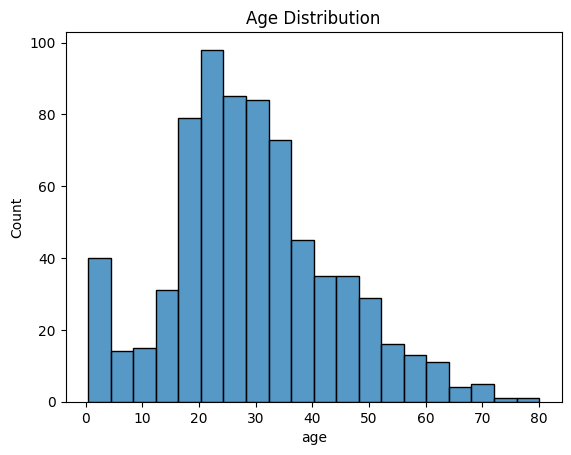

In [356]:
# Histogram of ages
sns.histplot(df['age'], bins=20)
plt.title('Age Distribution')
plt.show()

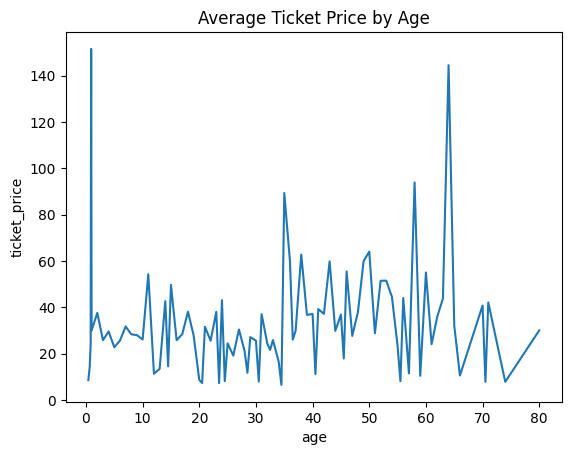

In [357]:
# Line plot: average ticket price by age
df_age = df.groupby('age')['ticket_price'].mean().reset_index()
sns.lineplot(data=df_age, x='age', y='ticket_price')
plt.title('Average Ticket Price by Age')
plt.show()

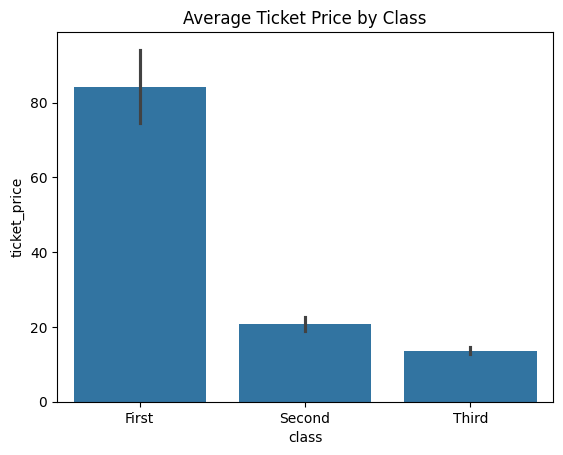

In [358]:
# Bar chart: average ticket price by class
sns.barplot(data=df, x='class', y='ticket_price', estimator=np.mean)
plt.title('Average Ticket Price by Class')
plt.show()

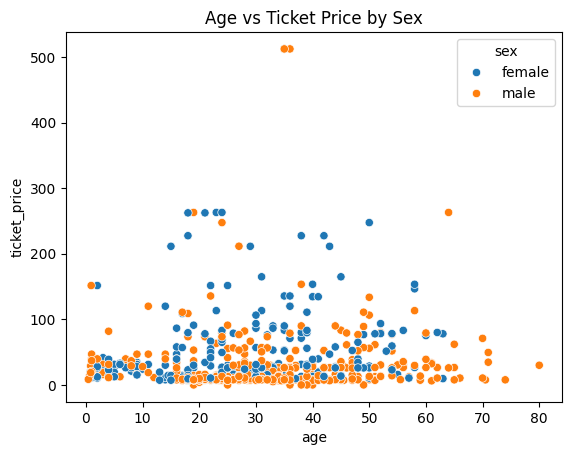

In [359]:
# Scatter plot: age vs ticket price
sns.scatterplot(data=df, x='age', y='ticket_price', hue='sex')
plt.title('Age vs Ticket Price by Sex')
plt.show()

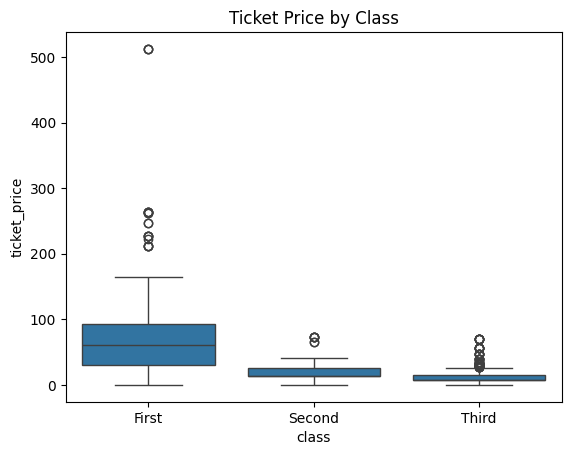

In [360]:
# Boxplot of ticket price by class
sns.boxplot(data=df, x='class', y='ticket_price')
plt.title('Ticket Price by Class')
plt.show()

### Exercise 10
1. Plot a histogram of 'petal_area' for the iris dataset.
2. Create a boxplot of 'sepal_len' by 'species'.
3. Make a scatter plot of 'sepal_len' vs 'petal_width', colored by 'species'.
4. Plot the mean 'petal_area' by 'species' as a bar chart.
5. Plot the mean 'sepal_len' by 'species' as a line plot.

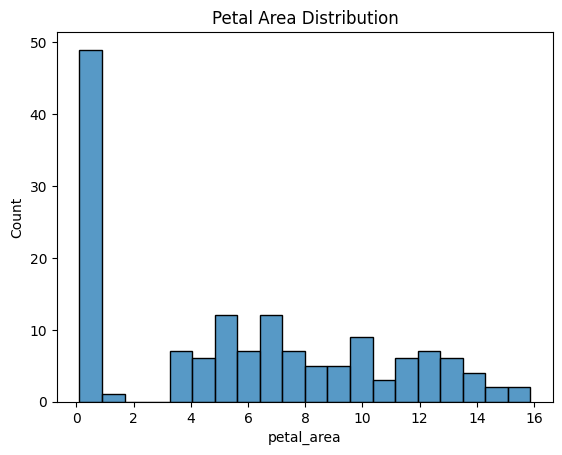

In [361]:
# Exercise 9.1: Histogram of petal_area
sns.histplot(iris['petal_area'], bins=20)
plt.title('Petal Area Distribution')
plt.show()

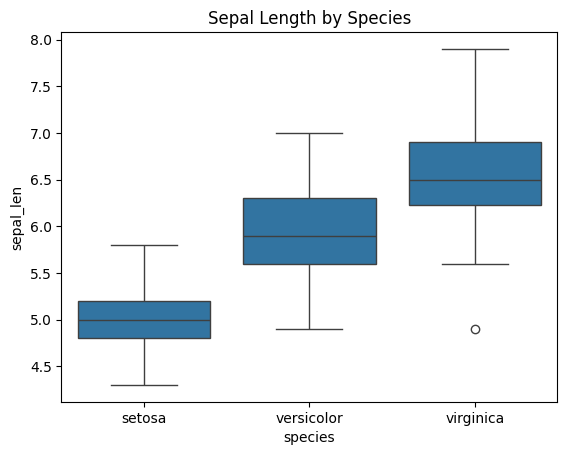

In [362]:
# Exercise 9.2: Boxplot of sepal_len by species
sns.boxplot(data=iris, x='species', y='sepal_len')
plt.title('Sepal Length by Species')
plt.show()

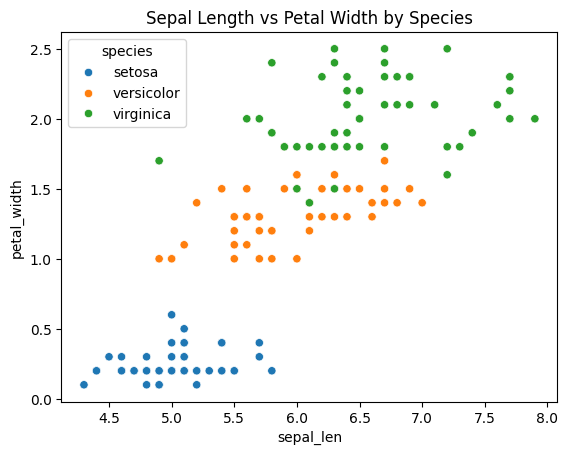

In [363]:
# Exercise 9.3: Scatter plot of sepal_len vs petal_width, colored by species
sns.scatterplot(data=iris, x='sepal_len', y='petal_width', hue='species')
plt.title('Sepal Length vs Petal Width by Species')
plt.show()

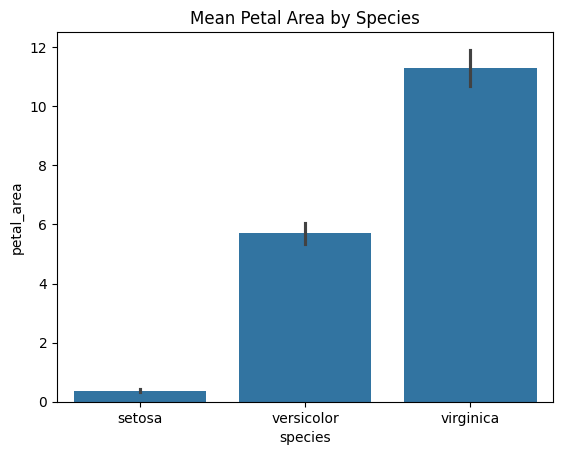

In [364]:
# Exercise 9.4: Bar chart of mean petal_area by species
sns.barplot(data=iris, x='species', y='petal_area', estimator=np.mean)
plt.title('Mean Petal Area by Species')
plt.show()

/var/folders/t9/0pk458_94qv27021t99vs5fr0000gn/T/ipykernel_55145/700337634.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_sepal = iris.groupby('species')['sepal_len'].mean().reset_index()


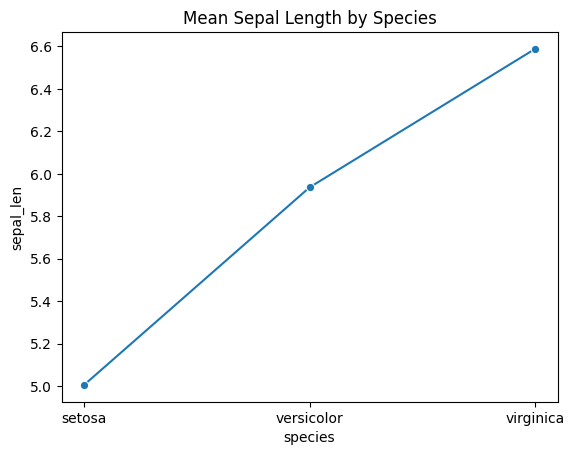

In [365]:
# Exercise 9.5: Line plot of mean sepal_len by species
mean_sepal = iris.groupby('species')['sepal_len'].mean().reset_index()
sns.lineplot(data=mean_sepal, x='species', y='sepal_len', marker='o')
plt.title('Mean Sepal Length by Species')
plt.show()

## 11. Cross-Tabulation (Crosstab) and Heatmaps

**Cross-tabulation** (`pd.crosstab`) creates a frequency table showing how often combinations of categorical variables occur together. This is essential for:
- Understanding relationships between categorical variables
- Preparing data for chi-square tests
- Identifying patterns in categorical data

**Key parameters:**
- `index`: Row variable
- `columns`: Column variable
- `margins`: Add row/column totals
- `normalize`: Convert to proportions ('index', 'columns', 'all')

Combined with `sns.heatmap()`, crosstabs provide powerful visual insights into categorical relationships.

In [366]:
# Basic crosstab: frequency counts using Titanic data
# Crosstab of survival by passenger class
crosstab_counts = pd.crosstab(df['pclass'], df['survived'])
crosstab_counts

survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


In [367]:
# Crosstab of sex by passenger class
crosstab_sex_class = pd.crosstab(df['sex'], df['pclass'])
crosstab_sex_class

pclass,1,2,3
sex,,,
female,94,76,144
male,122,108,347


In [368]:
# Crosstab with margins (totals)
crosstab_margins = pd.crosstab(df['pclass'], df['survived'], margins=True)
crosstab_margins

survived,0,1,All
pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [369]:
# Normalized crosstab (proportions by row)
crosstab_norm = pd.crosstab(df['pclass'], df['survived'], normalize='index')
crosstab_norm

survived,0,1
pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


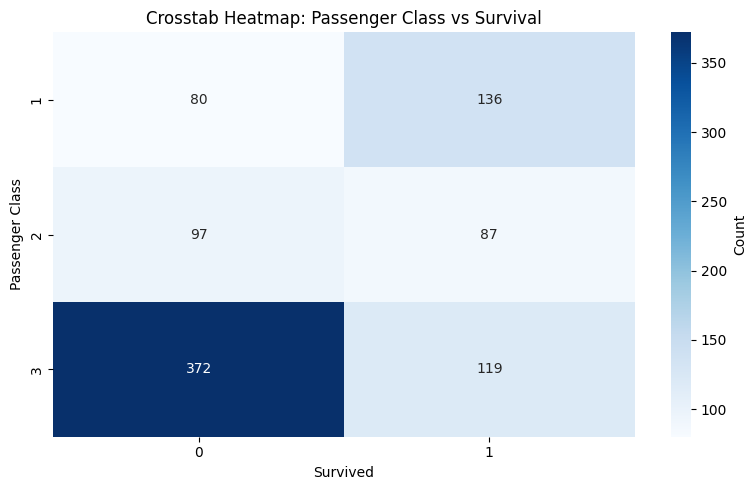

In [370]:
# Visualize crosstab with heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(crosstab_counts, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Crosstab Heatmap: Passenger Class vs Survival')
plt.xlabel('Survived')
plt.ylabel('Passenger Class')
plt.tight_layout()
plt.show()

### Exercise 11: Cross-Tabulation (using iris dataset)

**11.1** Create a new categorical column `sepal_size` by binning `sepal_len` into 3 categories (Small, Medium, Large).

**11.2** Create a crosstab between `species` and `sepal_size`.

**11.3** Create a normalized crosstab (by columns) and visualize it as a heatmap.

In [371]:
# Exercise 11.1: Create sepal_size column in iris
iris['sepal_size'] = pd.cut(iris['sepal_len'], bins=3, labels=['Small', 'Medium', 'Large'])
iris.head()

,sepal_len,sepal_width,petal_length,petal_width,species,petal_area,sepal_len_int,sepal_size
0,5.1,3.5,1.4,0.2,setosa,0.28,5,Small
1,4.9,3.0,1.4,0.2,setosa,0.28,4,Small
2,4.7,3.2,1.3,0.2,setosa,0.26,4,Small
3,4.6,3.1,1.5,0.2,setosa,0.30,4,Small
4,5.0,3.6,1.4,0.2,setosa,0.28,5,Small


In [372]:
# Exercise 11.2: Crosstab between species and sepal_size
pd.crosstab(iris['species'], iris['sepal_size'])

sepal_size,Small,Medium,Large
species,,,
setosa,47,3,0
versicolor,11,36,3
virginica,1,32,17


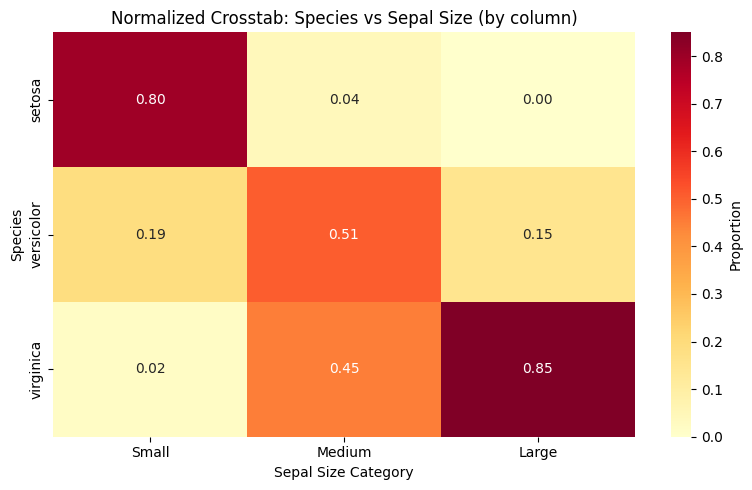

In [373]:
# Exercise 11.3: Normalized crosstab (by columns) with heatmap
crosstab_sepal = pd.crosstab(iris['species'], iris['sepal_size'], normalize='columns')

plt.figure(figsize=(8, 5))
sns.heatmap(crosstab_sepal, annot=True, fmt='.2f', cmap='YlOrRd', cbar_kws={'label': 'Proportion'})
plt.title('Normalized Crosstab: Species vs Sepal Size (by column)')
plt.xlabel('Sepal Size Category')
plt.ylabel('Species')
plt.tight_layout()
plt.show()